# Linear Regression and KNN on Vertebral Column Data Set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column. 

In [3]:
file = open("column_2C.dat", "r")
lines = file.readlines()

header_list = ["pelvic incidence", "pelvic tilt", "lumbar lordosis angle","sacral sloper","pelvic radius","grade of spondylolisthesis","class label"]
df = pd.read_csv("column_2C.dat", delimiter=r"\s+", names = header_list)
x = df.iloc[:, :6]
y = df['class label'].to_numpy()

for i in range(len(y)):
    if(y[i] == "AB"):
        y[i] = 1 
    elif (y[i] == "NO"):
        y[i] = 0

PreProcessing and Exploratory data analysis:

Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1. 

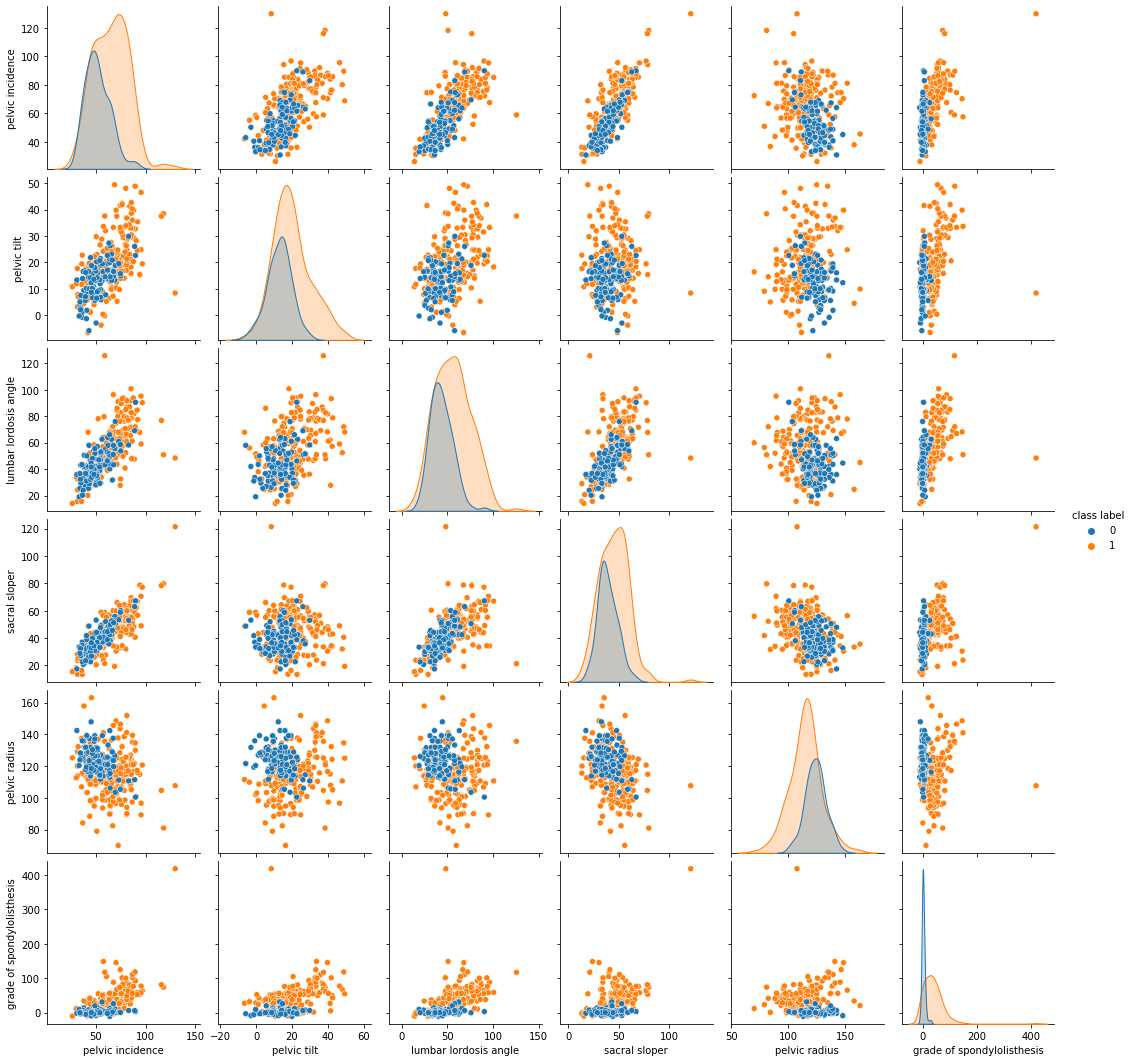

In [4]:
sns.pairplot(df, hue='class label')
plt.show()

Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

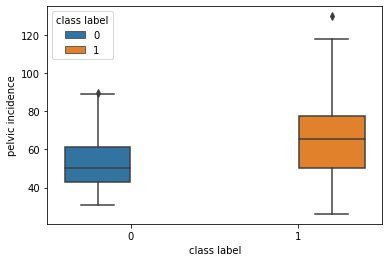

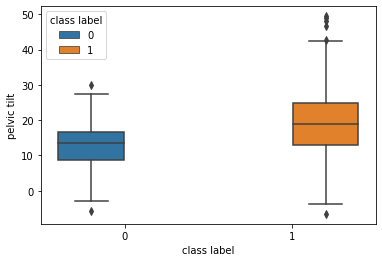

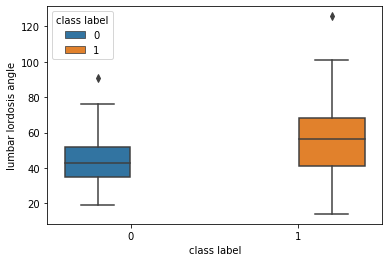

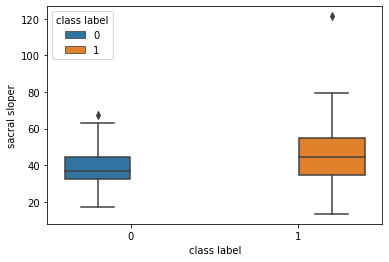

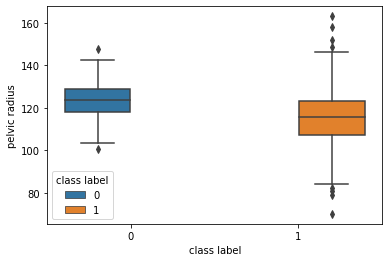

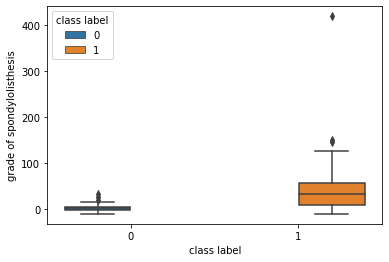

In [5]:
sns.boxplot(x=df['class label'], y=df['pelvic incidence'], hue=df['class label'])
plt.show()
sns.boxplot(x=df['class label'], y=df['pelvic tilt'], hue=df['class label'])
plt.show()
sns.boxplot(x=df['class label'], y=df['lumbar lordosis angle'], hue=df['class label'])
plt.show()
sns.boxplot(x=df['class label'], y=df['sacral sloper'], hue=df['class label'])
plt.show()
sns.boxplot(x=df['class label'], y=df['pelvic radius'], hue=df['class label'])
plt.show()
sns.boxplot(x=df['class label'], y=df['grade of spondylolisthesis'], hue=df['class label'])
plt.show()

Preprocessing - making trainingset and testingset

In [6]:
class0df = df[df["class label"] == 0]
class1df = df[df["class label"] == 1]

trainingset = pd.DataFrame()
testingset = pd.DataFrame()

class0num = 0
for num in range(len(class0df)):
    if(class0num < 70):
        trainingset = trainingset.append(class0df.iloc[num])
        class0num = class0num + 1
    else:
        testingset = testingset.append(class0df.iloc[num])
        class0num = class0num + 1

class1num = 0
for num in range(len(class1df)):
    if(class1num < 140):
        trainingset = trainingset.append(class1df.iloc[num])
        class1num = class1num + 1
    else:
        testingset = testingset.append(class1df.iloc[num])
        class1num = class1num + 1

# KNN Classification with Euclidean metric

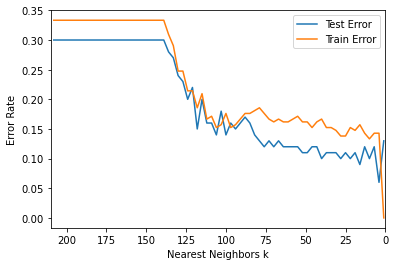

124 is the most suitable k among those values
The confusion matrix is: 
[[25  5]
 [ 1 69]]
[0.83333333 0.98571429] is your true positive rate
[0.98571429 0.83333333] is your true negative rate
0.9324324324324325 is your precision score
0.9583333333333333 is your f1 score


In [21]:
y_train = trainingset['class label'].to_numpy()
X_train = trainingset.drop(columns='class label')

y_test = testingset['class label'].to_numpy()
X_test = testingset.drop(columns='class label')

accuracies_test = []
accuracies_train = []
k = []

for i in range(208,-2,-3):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train, y_train)

    y_pred_test = classifier.predict(X_test)
    y_pred_train = classifier.predict(X_train)
    
    accuracies_test.append(1-accuracy_score(y_test, y_pred_test))
    accuracies_train.append(1-accuracy_score(y_train, y_pred_train))
    k.append(i)

plt.plot(k, accuracies_test, label="Test Error")
plt.plot(k, accuracies_train, label = "Train Error")

plt.xlim(210, 0)
plt.xlabel("Nearest Neighbors k")
plt.ylabel("Error Rate")
plt.legend()
plt.show()

k_star = k[np.argmax(accuracies)]
print(str(k_star) + " is the most suitable k among those values")

classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("The confusion matrix is: ")
print(cm)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

TPR = TP/(TP+FN)
print(str(TPR) + " is your true positive rate")
TNR = TN/(TN+FP) 
print(str(TNR) + " is your true negative rate")
pr = precision_score(y_test, y_pred)
print(str(pr) + " is your precision score")
f1 = f1_score(y_test, y_pred)
print(str(f1) + " is your f1 score")

Creating the learning curve

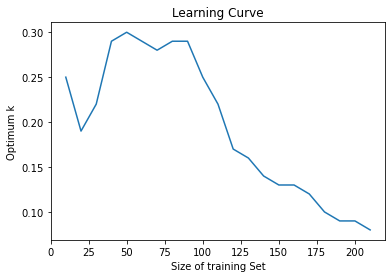

In [26]:
n_n = []
op_k = []
test_scores = []
for n in range(10, 211, 10):
    temptrainingset = pd.DataFrame()
    class0num = 0
    for num in range(len(class0df)):
        if(class0num < (n/3)):
            temptrainingset = temptrainingset.append(class0df.iloc[num])
            class0num = class0num + 1

    class1num = 0
    for num in range(len(class1df)):
        if(class1num < (n-(n/3))):
            temptrainingset = temptrainingset.append(class1df.iloc[num])
            class1num = class1num + 1

    y_train = temptrainingset['class label'].to_numpy()
    X_train = temptrainingset.drop(columns='class label')

    accuracies = []
    k = []

    for j in range(1, n, 5):
        classifier = KNeighborsClassifier(n_neighbors = j)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracies.append(1-accuracy_score(y_test, y_pred))
        k.append(j)

    k_star = k[np.argmax(accuracies)]
    op_k.append(k_star)
    
    test_scores.append(min(accuracies))
    n_n.append(n)
    
plt.plot(n_n, test_scores)
plt.title("Learning Curve")
plt.xlabel("Size of training Set")
plt.ylabel("Optimum k")
plt.show()

# Repeat using Manhattan Distance

Manhattan Distance Error
    Error
0    0.12
1    0.11
2    0.11
3    0.12
4    0.12
5    0.11
6    0.12
7    0.13
8    0.13
9    0.13
10   0.14
11   0.13
12   0.15
13   0.15
14   0.14
15   0.14
16   0.16
17   0.15
18   0.20
19   0.20
20   0.22
21   0.21
22   0.23
23   0.21
24   0.22
25   0.24
26   0.28
27   0.28
28   0.30
29   0.30
30   0.30
31   0.30
32   0.30
33   0.30
34   0.30
35   0.30
36   0.30
37   0.30
38   0.30
39   0.30


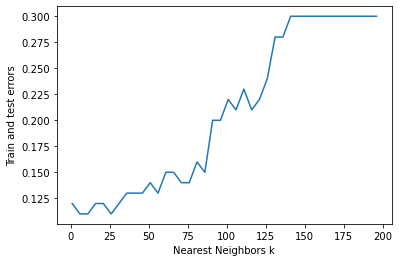

6 is the most suitable k among those values under minkowski distance


In [32]:
y_train = trainingset['class label'].to_numpy()
X_train = trainingset.drop(columns='class label')

y_test = testingset['class label'].to_numpy()
X_test = testingset.drop(columns='class label')

accuracies = []
k = []

for i in range(1, 197, 5):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 1)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    accuracies.append(1-accuracy_score(y_test, y_pred))
    k.append(i)

print("Manhattan Distance Error")
df_1 = pd.DataFrame(accuracies, columns=["Error"])
print(df_1)

plt.plot(k, accuracies)
plt.xlabel("Nearest Neighbors k")
plt.ylabel("Train and test errors")
plt.show()

k_star = k[np.argmin(accuracies)]
print(str(k_star) + " is the most suitable k among those values under minkowski distance")

In [35]:
accuracies = []
logs = [0.1 , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for val in logs:
    classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = pow(10, val))
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracies.append(1 - accuracy_score(y_test, y_pred))

print("Finding best log(base10)p")
df_2 = pd.DataFrame(accuracies, columns=["Error"])
print(df_2)
k_star = logs[np.argmin(accuracies)]
print(str(k_star) + " is the best log(base10)p")

Finding best log(base10)p
   Error
0   0.09
1   0.09
2   0.08
3   0.08
4   0.08
5   0.06
6   0.07
7   0.08
8   0.09
9   0.09
0.6 is the best log(base10)p


In [37]:
accuracies = []
k = []

for i in range(1, 197, 5):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'chebyshev')
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    accuracies.append(1-accuracy_score(y_test, y_pred))
    k.append(i)

print("Manhattan Distance Error")
df_1 = pd.DataFrame(accuracies, columns=["Error"])
print(df_1)

k_star = k[np.argmin(accuracies)]
print(str(k_star) + " is the most suitable k among those values under chebyshev distance")

Manhattan Distance Error
    Error
0    0.13
1    0.10
2    0.12
3    0.08
4    0.11
5    0.12
6    0.12
7    0.10
8    0.13
9    0.12
10   0.12
11   0.12
12   0.14
13   0.13
14   0.14
15   0.11
16   0.14
17   0.12
18   0.15
19   0.14
20   0.19
21   0.18
22   0.18
23   0.18
24   0.21
25   0.21
26   0.25
27   0.28
28   0.30
29   0.30
30   0.30
31   0.30
32   0.30
33   0.30
34   0.30
35   0.30
36   0.30
37   0.30
38   0.30
39   0.30
16 is the most suitable k among those values under chebyshev distance


C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
C:\Users\Victor Hui\anaconda

Mahalanobis Distance Error
    Error
0    0.17
1    0.17
2    0.20
3    0.20
4    0.21
5    0.20
6    0.23
7    0.21
8    0.24
9    0.24
10   0.24
11   0.26
12   0.25
13   0.27
14   0.26
15   0.25
16   0.24
17   0.26
18   0.26
19   0.26
20   0.28
21   0.29
22   0.29
23   0.29
24   0.30
25   0.30
26   0.30
27   0.30
28   0.30
29   0.30
30   0.30
31   0.30
32   0.30
33   0.30
34   0.30
35   0.30
36   0.30
37   0.30
38   0.30
39   0.30


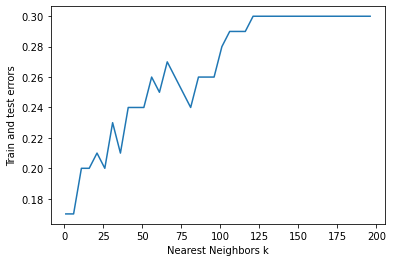

1 is the most suitable k among those values under mahalanobis distance


In [42]:
y_train = trainingset['class label'].to_numpy()
X_train = trainingset.drop(columns='class label')

y_test = testingset['class label'].to_numpy()
X_test = testingset.drop(columns='class label')

accuracies = []
k = []

for i in range(1, 197, 5):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'mahalanobis', metric_params = {'V': np.cov(X_train, rowvar=False)})
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    accuracies.append(1-accuracy_score(y_test, y_pred))
    k.append(i)
    
print("Mahalanobis Distance Error")
df_1 = pd.DataFrame(accuracies, columns=["Error"])
print(df_1)

plt.plot(k, accuracies)
plt.xlabel("Nearest Neighbors k")
plt.ylabel("Train and test errors")
plt.show()

k_star = k[np.argmin(accuracies)]
print(str(k_star) + " is the most suitable k among those values under mahalanobis distance")

# Euclidean Distance

In [53]:
accuracies = []
k = []

for i in range(1, 197, 5):
    classifier = KNeighborsClassifier(n_neighbors = i, p = 2, weights = 'distance')
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    accuracies.append(1-accuracy_score(y_test, y_pred))
    k.append(i)

k_star = k[np.argmin(accuracies)]
print(str(k_star) + " is K* with an error of " + (str)(accuracies[np.argmin(accuracies)]))

6 is K* with an error of 0.09999999999999998


# Manhattan Distance

In [55]:
accuracies = []
k = []

for i in range(1, 197, 5):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'manhattan', weights = 'distance')
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    accuracies.append(1-accuracy_score(y_test, y_pred))
    k.append(i)

k_star = k[np.argmin(accuracies)]
print(str(k_star) + " is K* with an error of " + (str)(accuracies[np.argmin(accuracies)]))

26 is K* with an error of 0.09999999999999998


# Chebyshev Distance

In [56]:
accuracies = []
k = []

for i in range(1, 197, 5):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'chebyshev', weights = 'distance')
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    accuracies.append(1-accuracy_score(y_test, y_pred))
    k.append(i)

k_star = k[np.argmin(accuracies)]
print(str(k_star) + " is K* with an error of " + (str)(accuracies[np.argmin(accuracies)]))

16 is K* with an error of 0.10999999999999999
